In [1]:
"""
Indeed Data Science Internship

Task: Given a file containing features and salary associated with those features, 
    I have to develop models to predict salary if features are provided as input
    
Kushal Shah
"""

#Libraries
import pandas as pd
from sklearn.svm import SVR
from sklearn import ensemble
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from ggplot import *
import warnings
import random
warnings.filterwarnings("ignore")
import numpy as np
from statsmodels.formula.api import ols

#############################

train_features = pd.read_csv('train_features_2013-03-07.csv')
train_labels = pd.read_csv('train_salaries_2013-03-07.csv')
    
#Exploring different features
features = train_features.columns.values
print(features)

#Merging features vector and labels 
train_df = pd.merge(left = train_features, right = train_labels, on = ['jobId', 'jobId']) 
cat_train_df = train_df.copy(deep = True)

['jobId' 'companyId' 'jobType' 'degree' 'major' 'industry'
 'yearsExperience' 'milesFromMetropolis']


In [2]:
#Printing unique values in columns
for col in train_df.columns.values:
    if col != 'jobId' and col != 'salary':
        print(col)
        print(train_df[col].unique())

companyId
['COMP37' 'COMP19' 'COMP52' 'COMP38' 'COMP7' 'COMP15' 'COMP24' 'COMP20'
 'COMP41' 'COMP56' 'COMP4' 'COMP54' 'COMP57' 'COMP14' 'COMP61' 'COMP58'
 'COMP3' 'COMP44' 'COMP30' 'COMP27' 'COMP34' 'COMP11' 'COMP31' 'COMP49'
 'COMP0' 'COMP1' 'COMP36' 'COMP47' 'COMP8' 'COMP42' 'COMP50' 'COMP53'
 'COMP48' 'COMP45' 'COMP46' 'COMP2' 'COMP5' 'COMP55' 'COMP29' 'COMP40'
 'COMP33' 'COMP22' 'COMP12' 'COMP25' 'COMP6' 'COMP23' 'COMP17' 'COMP28'
 'COMP21' 'COMP26' 'COMP43' 'COMP51' 'COMP10' 'COMP59' 'COMP13' 'COMP39'
 'COMP16' 'COMP9' 'COMP32' 'COMP62' 'COMP35' 'COMP18' 'COMP60']
jobType
['CFO' 'CEO' 'VICE_PRESIDENT' 'MANAGER' 'JUNIOR' 'JANITOR' 'CTO' 'SENIOR']
degree
['MASTERS' 'HIGH_SCHOOL' 'DOCTORAL' 'BACHELORS' 'NONE']
major
['MATH' 'NONE' 'PHYSICS' 'CHEMISTRY' 'COMPSCI' 'BIOLOGY' 'LITERATURE'
 'BUSINESS' 'ENGINEERING']
industry
['HEALTH' 'WEB' 'AUTO' 'FINANCE' 'EDUCATION' 'OIL' 'SERVICE']
yearsExperience
[10  3  8  2 23  9  1 17 24  7 21 13 11 14 18 20 12 15 22  0 19  5  4 16  6]
milesFromMe

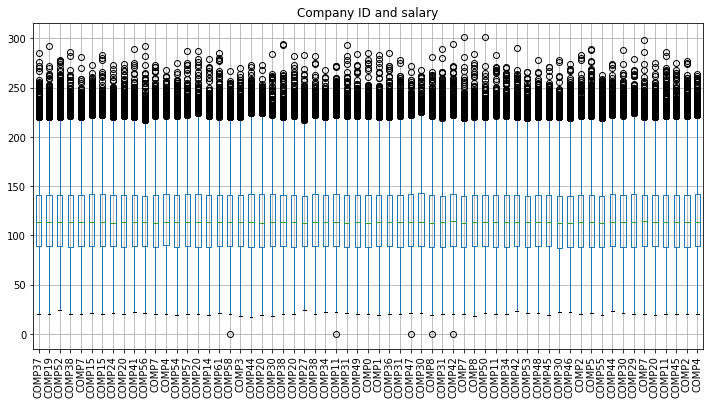

We see negligible variation between company ID and salary


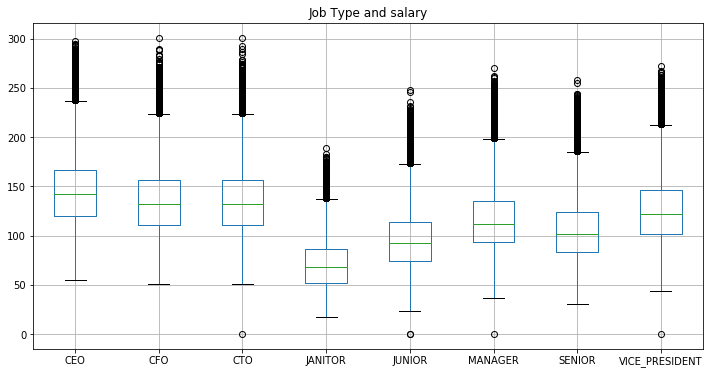

It shows how salary varies with changing job types


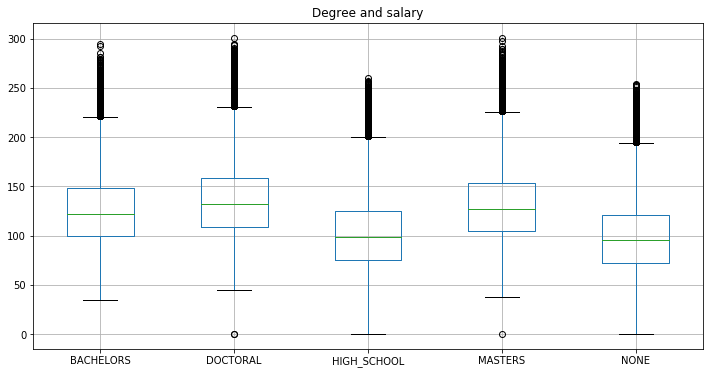

The median salary increases with increase in education level


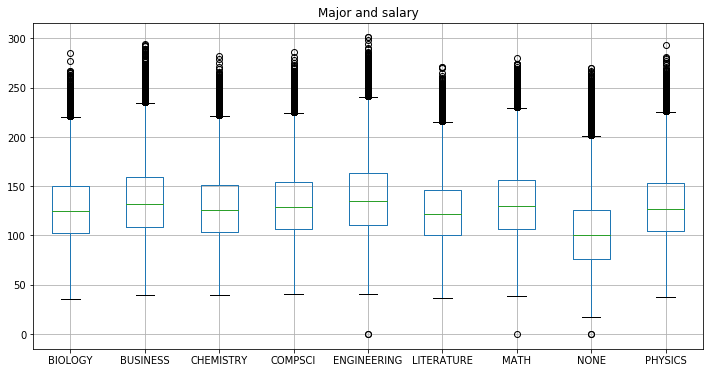

There is minimal variation between major and salary, but we do not see a clear winner


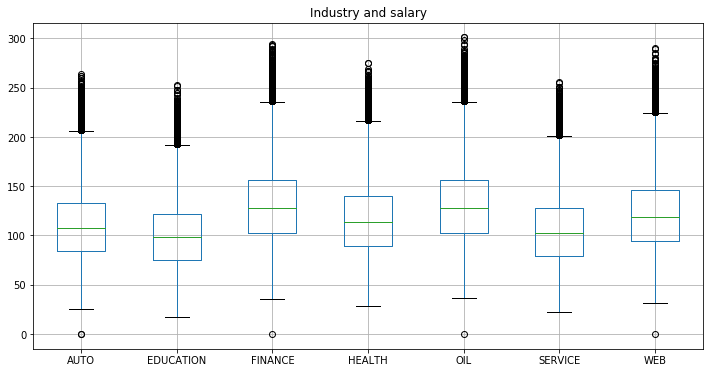

Sadly, the salaries in education are the lowest!


In [3]:
#Plotting different categorical variables with the label salary

#CompanyId and salary
plt.figure(figsize=(12, 6))
cID = train_df.pivot(values = 'salary', columns = 'companyId').boxplot()
cID.set_xticklabels(train_df['companyId'], rotation = 90) 
plt.title('Company ID and salary')
plt.show()

print("We see negligible variation between company ID and salary")

#Job type and salary
plt.figure(figsize=(12, 6))
jobType = train_df.pivot(values = 'salary', columns = 'jobType').boxplot()
plt.title('Job Type and salary')
plt.show()

print("It shows how salary varies with changing job types")

#Degree and salary
plt.figure(figsize=(12, 6))
degree = train_df.pivot(values = 'salary', columns = 'degree').boxplot()
plt.title('Degree and salary')
plt.show()

print("The median salary increases with increase in education level")

#Major and salary
plt.figure(figsize=(12, 6))
major = train_df.pivot(values = 'salary', columns = 'major').boxplot()
plt.title('Major and salary')
plt.show()

print("There is minimal variation between major and salary, but we do not see a clear winner")

#Industry and salary
plt.figure(figsize=(12, 6))
industry = train_df.pivot(values = 'salary', columns = 'industry').boxplot()
plt.title('Industry and salary')
plt.show()

print("Sadly, the salaries in education are the lowest!")

On smoothing the plot it suggests that in general the salary increases as years of experience increases


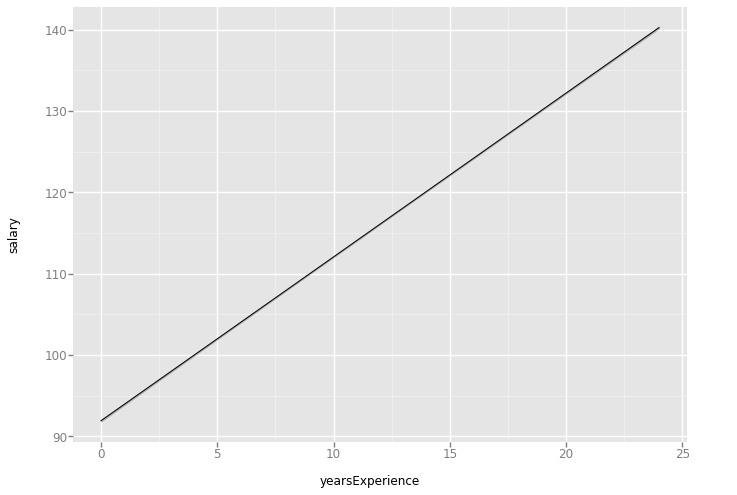

<ggplot: (-9223372036820817236)>
On smoothing the plot it suggests that in general the salary decreases as distance from metro increases


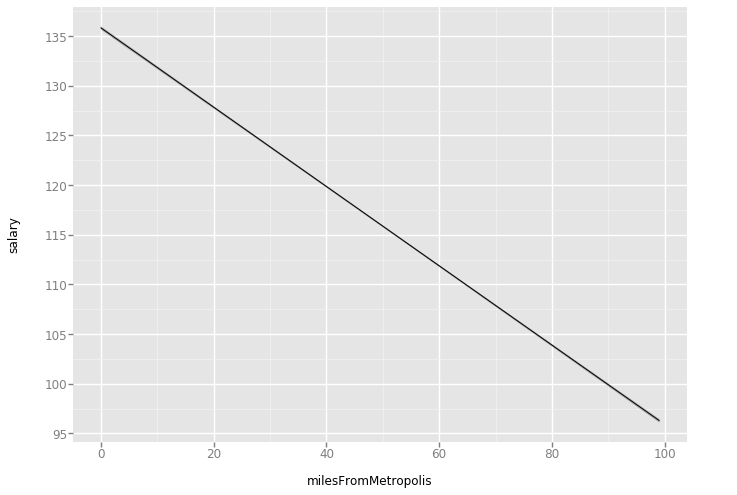

<ggplot: (41040248)>


In [4]:
#Plotting numerical variables with salary

plot1 = ggplot(train_df, aes(x = 'yearsExperience', y = 'salary')) + stat_smooth()
print('On smoothing the plot it suggests that in general the salary increases as years of experience increases')
print(plot1)

plot2 = ggplot(train_df, aes(x = 'milesFromMetropolis', y = 'salary')) + stat_smooth()
print('On smoothing the plot it suggests that in general the salary decreases as distance from metro increases')
print(plot2)

In [5]:
#Atleast there are no outliers in the variables. So, no apparent cleaning is required. 
#But since most of the variables are categorical - I can give numbers to those categories

for col in train_df.columns.values:
    if col != 'jobId' and col != 'salary' and train_df[col].dtype != 'int64':
        train_df[col] = train_df[col].astype('category').cat.codes

print(train_df.head())

              jobId  companyId  jobType  degree  major  industry  \
0  JOB1362684407687         31        1       3      6         3   
1  JOB1362684407688         11        0       2      7         6   
2  JOB1362684407689         48        7       1      8         3   
3  JOB1362684407690         32        5       1      2         0   
4  JOB1362684407691         60        7       0      8         2   

   yearsExperience  milesFromMetropolis  salary  
0               10                   83     130  
1                3                   73     101  
2               10                   38     137  
3                8                   17     142  
4                8                   16     163  


In [6]:
cor = cat_train_df.corr()
print(cor)

print('\nTrying Linear Regression now')
model = ols("salary ~ companyId + jobType + degree + major + industry\
            + yearsExperience + milesFromMetropolis", cat_train_df).fit()
print(model.summary())

print('The adjusted R2 is good, but my condition number is extremely high!')

                     yearsExperience  milesFromMetropolis    salary
yearsExperience             1.000000             0.000673  0.375013
milesFromMetropolis         0.000673             1.000000 -0.297666
salary                      0.375013            -0.297666  1.000000

Trying Linear Regression now
                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                 3.257e+04
Date:                Sat, 11 Feb 2017   Prob (F-statistic):               0.00
Time:                        16:50:39   Log-Likelihood:            -4.3948e+06
No. Observations:             1000000   AIC:                         8.790e+06
Df Residuals:                  999910   BIC:                         8.791e+06
Df Model:                          89                             

In [6]:
#Randomly selecting Training and testing data
if 'jobId' in train_df.columns.values:
    del train_df['jobId']
    
train_features = train_df.ix[:, train_df.columns != 'salary']
train_labels = train_df['salary']

rows = random.sample(list(train_df.index), int(len(train_df)*.80))
X_train, y_train = train_features.ix[rows], train_labels.ix[rows]
X_test, y_test = train_features.drop(rows), train_labels.drop(rows)

In [11]:
#Lets try to see how SVM Regression works with the dataset 

#clf = SVR(C = 1.0, epsilon = 0.2)
#clf.fit(train_features, train_labels)

#But, SVM is taking too long to complete. Ideally, we cannot wait for so much time. Let me try other methods

"""
I have commented the above function to train using SVM because of the time taken.
"""

'\nI have commented the above function to train using SVM because of the time taken.\n'

In [7]:
#Gradient boost regressor

#Low learning rate and more number of estimators
params = {'n_estimators': 500, 'max_leaf_nodes': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}

clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=4, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=500,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

MSE: 502.4386
Accuracy: 0.6651


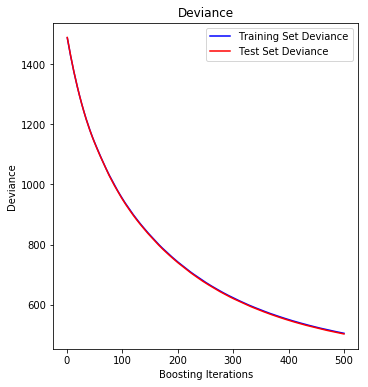

In [8]:
'''
After training the classifier - lets look at results.
'''

y_pred = clf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE: %.4f" % mse)

acc = clf.score(X_test, y_test)
print("Accuracy: %.4f" % acc) 

test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

#Boosting prediction using staged predict
for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

#Lets see training and test error
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
plt.show()

#Here we see that model has fit properly. Test error decreases along with train error. 

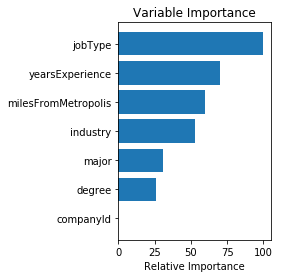

We see that Job type is the most important feature and company id is the lowest. So, people would be paid as long as they do a good job!


In [9]:
#Lets plot feature importance in this problem

feature_importance = clf.feature_importances_

# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, train_features[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

print('We see that Job type is the most important feature and company id is the lowest. So, people\
 would be paid as long as they do a good job!')

In [10]:
print('Trying Random Forest Regression now')

params = {"max_features": 7, "max_depth": None, "min_samples_split": 2, "n_jobs": -1}
randomForestModel = ensemble.RandomForestRegressor(**params)
randomForestModel.fit(X_train, y_train)

Trying Random Forest Regression now


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=7, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

MSE: 443.3428
Score: 0.7045


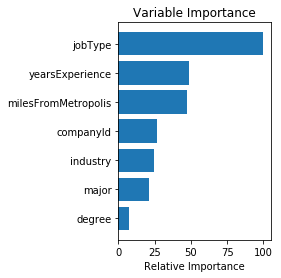


Random Forest is good, and is better than GBRT in terms of accuracy, but the 
feature importance is accurate in GBRT and hence would be tuning GBRT parameters.


In [11]:
y_pred = randomForestModel.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE: %.4f" % mse)

accuracy = randomForestModel.score(X_test, y_test)
print("Score: %.4f" % accuracy) 

feature_importance = randomForestModel.feature_importances_

# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, train_features[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

print("""\nRandom Forest is good, and is better than GBRT in terms of accuracy, but the 
feature importance is accurate in GBRT and hence would be tuning GBRT parameters.""")

In [12]:
#Gradient boost regressor

#Low learning rate and more number of estimators
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}

gbrt = ensemble.GradientBoostingRegressor(**params)
gbrt.fit(X_train, y_train)
y_pred = gbrt.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE: %.4f" % mse)

acc = gbrt.score(X_test, y_test)
print("Accuracy: %.4f" % acc) 

MSE: 412.8814
Accuracy: 0.7248


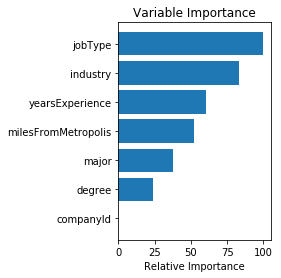

Now, we have a better model with greater accuracy


In [12]:
feature_importance = gbrt.feature_importances_

# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, train_features[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

print('Now, we have a better model with greater accuracy')

In [13]:
print('Predicting')

newX = pd.read_csv('train_features_2013-03-07.csv')
newX_test = newX[[col for col in newX.columns.values if col != 'jobId']] 

for col in newX_test.columns.values:
    if newX_test[col].dtype != 'int64':
        newX_test[col] = newX_test[col].astype('category').cat.codes

newY_pred = gbrt.predict(newX_test)
newX['salary'] = newY_pred
newX[['jobId', 'salary']].to_csv(path_or_buf = 'test_salaries.csv', sep = ',', index = False) 
print('Done')

Predicting
Done
